# **<p style="text-align: center;">Youtube Video Statistics Data Science Project</p>**
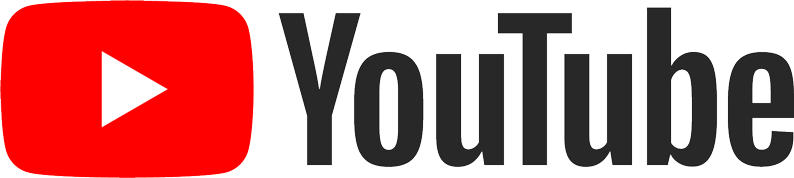

## About Dataset

This dataset contains two files with statistics on 1,881 YouTube videos
and their comments.

### video-stats.csv

-   **Title:** Video Title
-   **Video ID:** The Video Identifier.
-   **Published At:** The date the video was published in YYYY-MM-DD.
-   **Keyword:** The keyword associated with the video.
-   **Likes:** The number of likes the video received. If this value is
    -1, the likes are not publicly visible.
-   **Comments:** The number of comments the video has. If this value is
    -1, the video creator has disabled comments.
-   **Views:** The number of views the video got.

### comments.csv:

-   **Video ID:** The Video Identifier.
-   **Comment:** The comment text.
-   **Likes:** The number of likes the comment received.
-   **Sentiment:** The sentiment of the comment. A value of 0 represents
    a negative sentiment, while values of 1 or 2 represent neutral and
    positive sentiments respectively.
    
## Purpose

The purpose of analyzing this dataset was to explore what makes a "good"
video and see if we could predict whether a video performed well or
poorly based on its video and comment statistics. A good video and a bad
video were determined besed upon its like to view ratio
(`like_conversion_rate`). We thought this would be the best way to
determine the quality of the video because it does depend on viral
status or high view count to determine the quality of the video. Before
we began the project we knew we would have some limitations with the
dataset and would need more metrics to fit an accurate model. For
example, we knew that you can only like a video once where as you can
watch the video multiple times. With that being said, another one of our
goals was to be able to add features that are highly correlated to
`like_conversion_rate` to the dataset that would help improve the
overall accuracy of our model and assist in determining what is a good,
nuetral, or bad video.

# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicoloruffini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nicoloruffini/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Loading and Describing Datasets

In [3]:
videos = pd.read_csv("videos-stats.csv")
comments = pd.read_csv("comments.csv")

In [4]:
videos.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [5]:
comments.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [6]:
videos.describe()

,Unnamed: 0,Likes,Comments,Views
count,1881.000000,1.879000e+03,1879.000000,1.879000e+03
mean,940.000000,1.700610e+05,7863.331559,1.161292e+07
std,543.142247,7.962293e+05,37879.964926,1.084450e+08
min,0.000000,-1.000000e+00,-1.000000,2.500000e+01
25%,470.000000,2.672500e+03,199.000000,8.451500e+04
50%,940.000000,1.478700e+04,814.000000,5.917210e+05
75%,1410.000000,6.090600e+04,3377.500000,2.804978e+06
max,1880.000000,1.644556e+07,732818.000000,4.034122e+09


In [7]:
comments.describe()

,Unnamed: 0,Likes,Sentiment
count,18409.000000,18409.000000,18409.000000
mean,9204.000000,1040.019447,1.493998
std,5314.364888,10651.366148,0.709928
min,0.000000,0.000000,0.000000
25%,4602.000000,5.000000,1.000000
50%,9204.000000,29.000000,2.000000
75%,13806.000000,190.000000,2.000000
max,18408.000000,891372.000000,2.000000


In [8]:
videos.drop(columns="Unnamed: 0", axis=1, inplace=True)
comments.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [9]:
videos.columns = videos.columns.str.lower().str.replace(" ", "_")
comments.columns = comments.columns.str.lower().str.replace(" ", "_")

In [10]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1881 non-null   object 
 1   video_id      1881 non-null   object 
 2   published_at  1881 non-null   object 
 3   keyword       1881 non-null   object 
 4   likes         1879 non-null   float64
 5   comments      1879 non-null   float64
 6   views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 103.0+ KB


In [11]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   video_id   18409 non-null  object 
 1   comment    18408 non-null  object 
 2   likes      18409 non-null  float64
 3   sentiment  18409 non-null  float64
dtypes: float64(2), object(2)
memory usage: 575.4+ KB


# Dealing with Null Values
As shown above, the videos DataFrame has two rows with missing values and the comments DataFrame has one. Since there are minimal null values in the DataFrame, we decided to drop these rows.

In [12]:
videos = videos.dropna()
comments = comments.dropna()

In [13]:
videos.isnull().sum()

title           0
video_id        0
published_at    0
keyword         0
likes           0
comments        0
views           0
dtype: int64

In [14]:
comments.isnull().sum()

video_id     0
comment      0
likes        0
sentiment    0
dtype: int64

# Dealing with Duplicate Values
While exploring the videos DataFrame we discovered that there were 12 records that had repeated values in the video_id column. For every duplicated record every value was the same besides the keyword column. Since only 12 out of 1881 values were duplicates, we decided to drop the duplicate records that showed up second.

In [15]:
videos.loc[videos.video_id.duplicated(keep=False), :].sort_values("video_id")

,title,video_id,published_at,keyword,likes,comments,views
1714,Vikram Vedha Movie Teaser Review | KRK | #krkr...,2FYvHn12pOQ,2022-08-24,movies,-1.0,105.0,1541874.0
1055,Vikram Vedha Movie Teaser Review | KRK | #krkr...,2FYvHn12pOQ,2022-08-24,reaction,29728.0,8832.0,405791.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
88,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,gaming,63825.0,3338.0,1564007.0
1501,Computer Scientist Explains Machine Learning i...,5q87K1WaoFI,2021-08-18,computer science,42940.0,1735.0,1407319.0
1832,Computer Scientist Explains Machine Learning i...,5q87K1WaoFI,2021-08-18,machine learning,15137.0,181.0,906372.0
1762,Python Machine Learning Tutorial (Data Science),7eh4d6sabA0,2020-09-17,data science,7555.0,442.0,295344.0
1835,Python Machine Learning Tutorial (Data Science),7eh4d6sabA0,2020-09-17,machine learning,1237.0,16.0,32605.0
1554,🚨 DÉPÊCHEZ-VOUS 🚨 Ces PROMOS disparaissent bie...,96mrgd8-3yE,2022-08-24,nintendo,406.0,57.0,13184.0
1595,🚨 DÉPÊCHEZ-VOUS 🚨 Ces PROMOS disparaissent bie...,96mrgd8-3yE,2022-08-24,xbox,406.0,57.0,13184.0


In [16]:
videos = videos.drop_duplicates(subset=['video_id'])

In [17]:
videos.video_id.duplicated().sum()

0

We also discovered that the dataset had -1 values for records that disabled likes or comments on the video. In order to keep our data consistent, we dropped these records from our DataFrame.

In [18]:
print(videos[videos.likes == -1].shape)
print(videos[videos.comments == -1].shape)

(6, 7)
(2, 7)


In [19]:
videos = videos[videos.likes != -1]
videos = videos[videos.comments != -1]

# Feature Engineering
### Feature Engineering Summary:
After cleaning and analyzing our dataset we decided to add some
variables that might be useful in our ML model. We added these variables
because we thought they might have an impact on the like conversion rate
of videos.

-   **avg_comm_len:** Average comment length for each video
-   **title_len:** Title length
-   **avg_comm_sent:** Average comment sentiment score for each video
-   **sent_title:** Title sentiment score
-   **month:** Month in numerical form (1 being January, 2 being
    February, etc.)
-   **like_conversion_rate:** Percent of likes per view
-   **like_conversion_cat:** Like conversion rate assigned a certain
    category based on value (Bad, Neutral, or Good)

Average Comment Length:

In [20]:
comments["comment_len"] = comments.comment.str.split().apply(lambda x: len(x))
avg_com_len = comments.groupby("video_id")["comment_len"].mean()
videos = pd.merge(videos, avg_com_len, how="inner", on=["video_id"]).rename(columns={'comment_len':'avg_comm_len'})

Title Length:

In [21]:
videos['title_len'] = videos['title'].str.split().apply(lambda x: len(x))

Remove Stopwords and Get Sentiment Score Functions:

In [22]:
def remove_stopwords(title):
    title = title.lower()
    temp_title = title.split(' ')
    temp_title = [i for i in temp_title if i not in stopwords.words('english')]
    return ' '.join(temp_title)

In [23]:
sid = SentimentIntensityAnalyzer()

In [24]:
def get_sent(sentence):
    sentiment_ = sid.polarity_scores(sentence)
    return sentiment_['compound']

Comment Sentiment Score:

In [25]:
comments['comment'] = comments['comment'].apply(remove_stopwords)

In [26]:
comments['comm_sent'] = comments['comment'].apply(get_sent)

In [27]:
avg_sent = comments.groupby('video_id')['comm_sent'].mean()
videos = pd.merge(videos, avg_sent, how="inner", on=["video_id"]).rename(columns={'comm_sent':'avg_comm_sent'})

Title Sentiment Score:

In [28]:
videos['title'] = videos['title'].apply(remove_stopwords)
videos['sent_title'] = videos['title'].apply(get_sent)

Month:

In [29]:
videos['published_at'] = videos['published_at'].apply(pd.to_datetime)
videos['month'] = videos['published_at'].apply(lambda x: x.month)

Like Conversion Rate:

In [30]:
videos['like_conversion_rate'] = videos.apply(lambda x: (x['likes'] / x['views'])*100, axis=1 )

Like Conversion Rate Categorical Value:

In [31]:
pd.qcut(videos.like_conversion_rate, 3).value_counts().sort_index()

like_conversion_rate
(-0.001, 1.908]    620
(1.908, 3.76]      619
(3.76, 21.858]     620
Name: count, dtype: int64

In [32]:
like_cat = pd.qcut(videos.like_conversion_rate, 3, labels=["Bad", "Neutral", "Good"])
videos["like_conversion_cat"] = like_cat

In [33]:
videos_final = videos.copy()
videos_final.head()

,title,video_id,published_at,keyword,likes,comments,views,avg_comm_len,title_len,avg_comm_sent,sent_title,month,like_conversion_rate,like_conversion_cat
0,apple pay killing physical wallet eight years ...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,36.6,18,0.39121,-0.7003,8,2.512315,Neutral
1,expensive thing own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0,44.6,6,0.69465,0.0000,8,4.367250,Good
2,new house gaming setup sick!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0,29.4,7,0.35491,-0.5562,8,4.080864,Good
3,petrol vs liquid nitrogen | freezing experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0,12.7,16,0.20926,-0.1027,8,7.754318,Good
4,best back school tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0,77.3,6,0.81395,0.6696,8,5.201051,Good


# EDA

##### EDA for Title Length:
-   Most titles seem to be around 7-13 in length no matter the like
    conversion rate
-   Videos with a neutral conversion rate have a smaller distribution of
    title length
-   Videos on either end have similar distribution

Text(0, 0.5, 'Title Length')

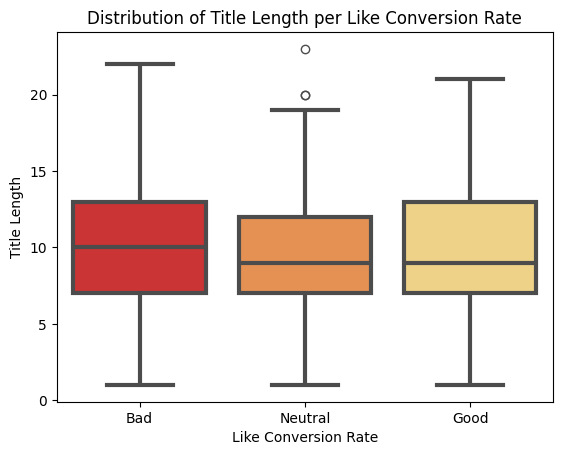

In [34]:
ax = sns.boxplot(data=videos_final, x="like_conversion_cat", y="title_len", linewidth=3, palette='YlOrRd_r')
plt.title('Distribution of Title Length per Like Conversion Rate')
plt.xlabel("Like Conversion Rate")
plt.ylabel("Title Length")

##### EDA for Average Comment Length:
-   When looking at the title sentiment score, the distribution for the
    average comment length between the three categories are similar

Text(0, 0.5, 'Average Comment Length')

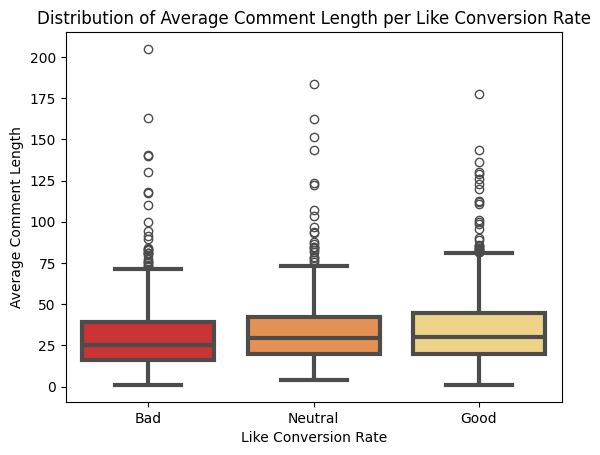

In [35]:
ax = sns.boxplot(data=videos_final, x="like_conversion_cat", y="avg_comm_len", linewidth=3, palette='YlOrRd_r')
plt.title('Distribution of Average Comment Length per Like Conversion Rate')
plt.xlabel("Like Conversion Rate")
plt.ylabel("Average Comment Length")

#### EDA for Average Comment Sentiment Score:
- When looking at the average comment sentiment score, videos in the bad like conversion rate category have a wider distribution
- The other two categories have similar distributions

Text(0, 0.5, 'Average Comment Sentiment')

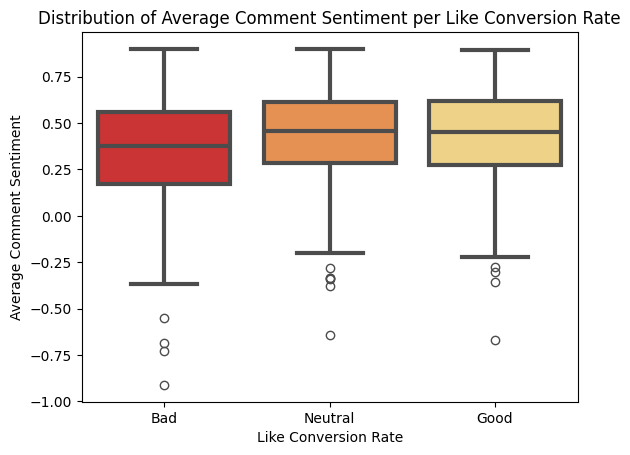

In [36]:
ax = sns.boxplot(data=videos_final, x="like_conversion_cat", y="avg_comm_sent", linewidth=3, palette='YlOrRd_r')
plt.title('Distribution of Average Comment Sentiment per Like Conversion Rate')
plt.xlabel("Like Conversion Rate")
plt.ylabel("Average Comment Sentiment")

#### EDA for Title Sentiment Score:
- When looking at the title sentiment score the three distributions are significantly different
- Videos with a bad like conversion rate have a wide distributions
- Videos with a neutral like conversion rate have title sentiment scores that are too spread out to generate a boxplot
- Videos with a good like conversion rate have a smaller distribution

Text(0, 0.5, 'Title Sentiment')

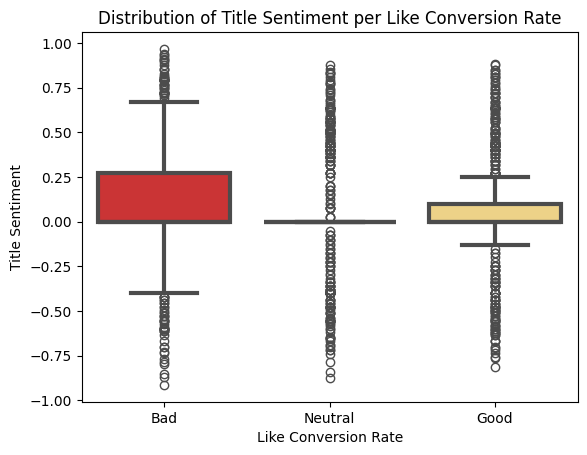

In [37]:
ax = sns.boxplot(data=videos_final, x="like_conversion_cat", y="sent_title", linewidth=3, palette='YlOrRd_r')
plt.title('Distribution of Title Sentiment per Like Conversion Rate')
plt.xlabel("Like Conversion Rate")
plt.ylabel("Title Sentiment")

#### EDA for Month:
- There is a lot of videos from the dataset created in August
- A high proportion of the videos produced in August are in the good like conversion category
- The rest of the months do not follow this pattern

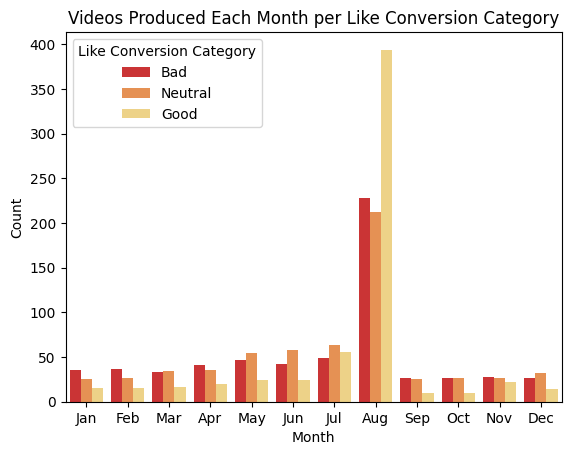

In [38]:
ax = sns.countplot(data=videos_final, x="month", hue="like_conversion_cat",palette='YlOrRd_r')
plt.xlabel("Month") 
plt.ylabel("Count")
plt.title("Videos Produced Each Month per Like Conversion Category")
plt.legend(title="Like Conversion Category")
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.show()

#### EDA for Keyword:
- There is a wide range of like conversion rate values per Keyword
- Crypto, Reaction, and Gaming are the top three by almost a full percent
- Some of the more broad topics like sports, news, and animals are towards the bottom

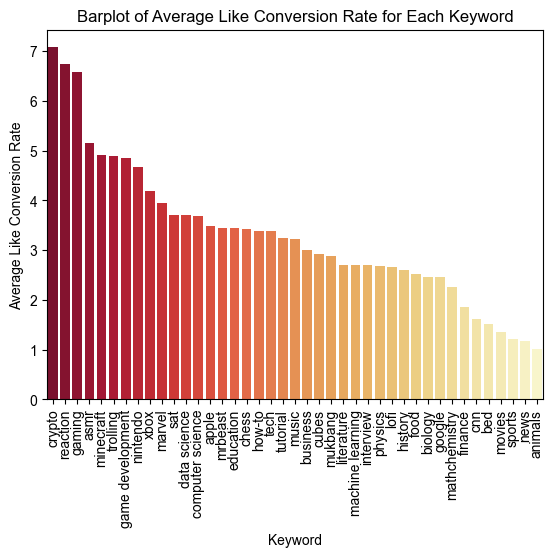

In [39]:
viz6 = videos_final.groupby('keyword')['like_conversion_rate'].mean().sort_values(ascending=False)
viz6 = pd.DataFrame(viz6).reset_index()
sns.barplot(data=viz6, x='keyword', y='like_conversion_rate', palette='YlOrRd_r')
plt.xticks(rotation=90, ha='center')
sns.set(rc={'figure.figsize': (10, 8)})
plt.xlabel('Keyword')
plt.ylabel('Average Like Conversion Rate')
plt.title("Barplot of Average Like Conversion Rate for Each Keyword")
plt.show()

# Importing Machine Learning Libraries

In [50]:
from sklearn import manifold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Machine Learning
### Linear Regression Model

In [51]:
videos_final = videos.copy()
videos_final.drop(["title", "video_id", "likes", "views", "published_at", "like_conversion_cat"], axis=1, inplace=True)

#### Stratified Shuffle Split

We decided to use a stratified shuffle split on the keyword column because during the EDA section we discovered that there was a vast range of average like conversion rates given a keyword value. Since there are no more than 50 rows of each keyword value, we decided it was necessary to complete a stratified shuffle split to make sure the train and test data sets have an accurate distribution of the different keywords.

In [52]:
videos_final.keyword.value_counts()

keyword
crypto              50
tutorial            50
cnn                 50
interview           50
physics             50
trolling            50
mrbeast             50
data science        50
game development    50
sat                 49
marvel              49
cubes               49
reaction            49
asmr                49
sports              49
history             49
tech                48
nintendo            48
computer science    48
xbox                48
minecraft           48
food                48
how-to              48
biology             47
chess               47
literature          46
business            46
machine learning    46
music               46
bed                 44
google              44
mukbang             44
apple               42
gaming              42
movies              41
lofi                40
news                39
finance             39
animals             38
education           24
mathchemistry       15
Name: count, dtype: int64

In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(videos_final, videos_final['keyword']):
    strat_train_set = videos_final.iloc[train_index]
    strat_test_set = videos_final.iloc[test_index]

display(strat_train_set.shape, strat_test_set.shape)

(1487, 8)

(372, 8)

In [54]:
X = strat_train_set.drop('like_conversion_rate', axis=1)
y = strat_train_set['like_conversion_rate']

num_attribs = ['comments', 'avg_comm_len', 'sent_title', 'title_len', 'avg_comm_len']

cat_attribs = ['keyword', 'month']

In [55]:
full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

prep = full_pipeline.fit_transform(X)

In [56]:
lm = LinearRegression()
lm.fit(prep, y)
lm.score(prep, y)

0.3651258190528145

#### Linear Regression Score

Our Linear Regression model has an R^2 coefficient of 0.365, indicating that around 36.5% of the variability observed in the like conversion rate value can be explained by the regression model.

In [57]:
test_y = strat_test_set['like_conversion_rate']
test_X = strat_test_set.drop('like_conversion_rate', axis=1)

test_prep = full_pipeline.transform(test_X)

In [58]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, lm.predict(test_prep))
mse

3.906552708285434

In [59]:
rmse = np.sqrt(mse)
rmse

1.9765001159335747

In [60]:
videos_final.like_conversion_rate.describe()

count    1859.000000
mean        3.364707
std         2.569841
min         0.000000
25%         1.522041
50%         2.755826
75%         4.450807
max        21.857510
Name: like_conversion_rate, dtype: float64

#### Root Mean Squared Error

Our root mean squared error value came out to 1.976, which means that on average our predictions from the linear regression model of like conversion rate deviate from the actual value by 1.976. This value falls slightly below the standard deviation of the like conversion rate distribution at 2.569. While the model isn't extremely accurate, it performs slightly better on average than picking a random value from the distribution.

### Classification Models

In [61]:
videos_final = videos.copy()
videos_final.drop(["title", "video_id", "likes", "views", "published_at", "like_conversion_rate"], axis=1, inplace=True)

In [62]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(videos_final, videos_final['keyword']):
    strat_train_set = videos_final.iloc[train_index]
    strat_test_set = videos_final.iloc[test_index]

X_train = strat_train_set.drop('like_conversion_cat', axis=1)
y_train = strat_train_set['like_conversion_cat']
X_test = strat_test_set.drop('like_conversion_cat', axis=1)
y_test = strat_test_set['like_conversion_cat']

In [63]:
num_attribs = ['comments', 'avg_comm_len', 'sent_title', 'title_len', 'avg_comm_len']
cat_attribs = ['keyword', 'month']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_X_prepared = full_pipeline.fit_transform(X_train)
test_X_prepared = full_pipeline.transform(X_test)

In [64]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    ]

In [65]:
X_train = train_X_prepared
X_test = test_X_prepared

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # evaluate predictions
    accuracy = clf.score(X_test, y_test)
    print("%s Accuracy: %.2f%%" % (name,accuracy * 100.0))

Nearest Neighbors Accuracy: 50.54%
Linear SVM Accuracy: 52.42%
RBF SVM Accuracy: 47.04%
Decision Tree Accuracy: 50.00%
Random Forest Accuracy: 53.23%
Neural Net Accuracy: 58.60%
AdaBoost Accuracy: 54.03%


#### Interpreting Model Accuracy

The most accurate model we created is the neural net model which has an average accuracy of classification of 59.68%. While the model isn't extremely accurate in predicting the like conversion category, more often than not, it predicts the correct category that a video falls into. The neural net model is significantly more accurate than guessing a like conversion category at random. It is not a suprise that the neural net classifier is more accurate than the other classifiers we tried, as neural nets are much more complex models, allowing them to handle more nuanced classifications. Since we saw little correlation between most features and like conversion rate, it makes sense that the neural net classification performed the strongest at predicting like conversion categories.

The least accurate model is the RBF SVM. This is not a suprise, as our dataset does not make much sense to use with support vector machine models. Unlike the neural net classifier, these types of models perform better when there is a clear margin of seperation between classes, minimal noise, and are used on smaller data sets.

In [66]:
X = videos_final.drop('like_conversion_cat', axis=1)
y = videos_final['like_conversion_cat']

X_prepared = full_pipeline.fit_transform(X)

In [67]:
classifier = MLPClassifier(alpha=1, max_iter=1000)
classifier.fit(X_prepared, y)

MLPClassifier(alpha=1, max_iter=1000)

# Summary

-   Deciding project topic
    -   We took too much time deciding on what we were going to do our
        project on. If we would have had a more efficient brainstorming
        approach it would have saved us a significant amount of time.
-   Cleaning our data multiple times throughout the project
    -   When we first started our project we did not do much initial
        EDA. A consequence of this is that we had to go back and
        re-clean our data multiple times throughout the project. For
        example, we did not realize that there were duplicate values in
        our dataset until we were about to create our model. If we would
        would have dont an throughout initial EDA then it would have
        saved us time.
-   Inefficient feature engineering
    -   When we first started feature engineering we were creating any
        column that came to mind. This was a waste of time and energy.
        We should have sat down as a time and brainstomed a list of
        features that might have been interesting instead of
        implementing them right away.
    -   When creating the like_conversion_rate we should have taken into
        account that people can like a video only once, but are able to
        watch the video multiple times. This influenced our model
        slightly. We knew we did not want to just do like count because
        that might have bias toward people with more subscribers, so we
        should have brainstormed more about what we wanted to find to
        classify a good and bad video.
-   Not much correlation
    -   Throughout our EDA and ML model we realized that our variables
        did not have much correlation. Even though this is a finding in
        itself, it would have been more rewarding to work on a topic
        that had more correlation. We should have done some initial
        correlation analysis on multiple datasets to find one that might
        be more rewarding.

In the future, for this specific project it might be useful to bring in
outside data if it is accessible and merge it with this dataset. I think
the model would perform a lot better if it had other metric including
Video Length, Thumbnail, Dislikes, Watchtime, Play Rate, Social Shares.
These are all things that go into showing whether a video will perform
well or not because we know that people can only like a video once but
can watch it multiple times. It would also be interesting to use
Youtube's free data api to scrape for more data about each of the
videos. The addition of this outside data would have gotten rid of the
uncertainty and bias of people being able to watch a video multiple
times while only being able to like it once. With more time and
resources the accuracy for predicting the classification of the video
can be improved drastically.